In [31]:
import numpy as np
import pandas as pd
import yfinance as yf

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2019-01-01'
end = '2022-12-30'

# Tickers of assets
assets = ["GC=F", 'MSFT', 'TSLA', 'WMT', 'JPM', 'SHEL']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.head())

[*********************100%***********************]  6 of 6 completed


,GC=F,JPM,MSFT,SHEL,TSLA,WMT
Date,,,,,,
2019-01-03,0.8431%,-1.4212%,-3.6788%,-0.2191%,-3.1472%,-0.5143%
2019-01-04,-0.7045%,3.6865%,4.6509%,2.2631%,5.7697%,0.6246%
2019-01-07,0.3196%,0.0696%,0.1275%,0.1321%,5.4361%,1.1772%
2019-01-08,-0.2798%,-0.1886%,0.7251%,-0.6103%,0.1164%,0.6981%
2019-01-09,0.4754%,-0.1691%,1.4300%,1.1616%,0.9483%,-0.3256%


In [32]:
Y

,GC=F,JPM,MSFT,SHEL,TSLA,WMT
Date,,,,,,
2019-01-03,0.8431%,-1.4212%,-3.6788%,-0.2191%,-3.1472%,-0.5143%
2019-01-04,-0.7045%,3.6865%,4.6509%,2.2631%,5.7697%,0.6246%
2019-01-07,0.3196%,0.0696%,0.1275%,0.1321%,5.4361%,1.1772%
2019-01-08,-0.2798%,-0.1886%,0.7251%,-0.6103%,0.1164%,0.6981%
2019-01-09,0.4754%,-0.1691%,1.4300%,1.1616%,0.9483%,-0.3256%
...,...,...,...,...,...,...
2022-12-22,-1.5915%,-1.1350%,-2.5529%,-1.4931%,-8.8828%,-1.1710%
2022-12-23,0.4980%,0.4745%,0.2267%,1.8329%,-1.7551%,0.2021%
2022-12-27,1.0524%,0.3504%,-0.7414%,0.1558%,-11.4089%,0.0278%


In [33]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='ewma1' # Method to estimate expected returns based on historical data.
method_cov='ewma1' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector
w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,GC=F,JPM,MSFT,SHEL,TSLA,WMT
weights,29.1360%,18.4072%,10.1437%,14.5373%,6.7358%,21.0399%


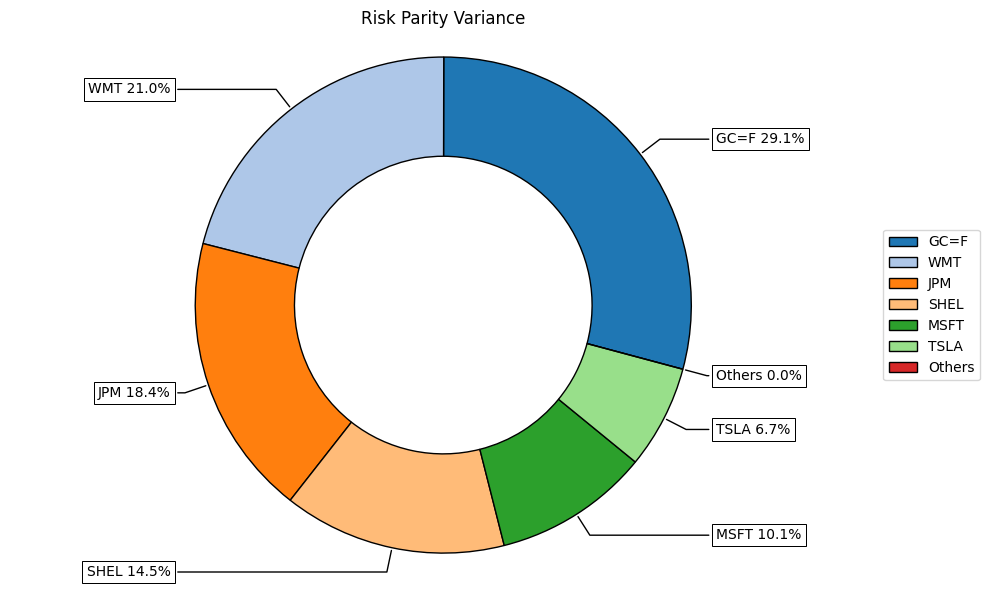

In [34]:
ax = rp.plot_pie(w=w_rp,
                 title='Risk Parity Variance',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

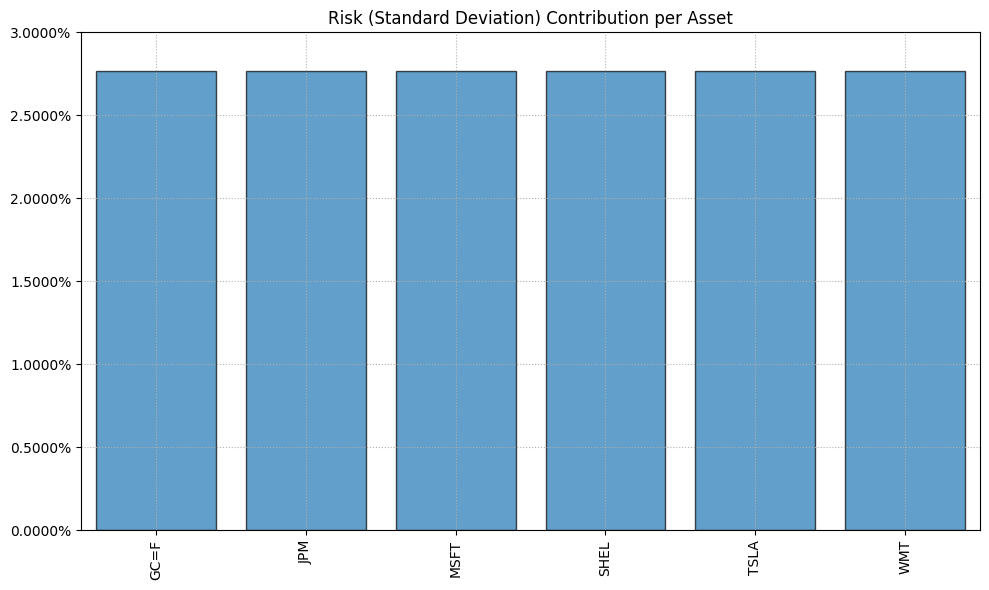

In [35]:
ax = rp.plot_risk_con(w=w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [36]:
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,GC=F,JPM,MSFT,SHEL,TSLA,WMT
weights,45.7936%,1.3582%,16.0959%,0.0000%,16.3269%,20.4254%


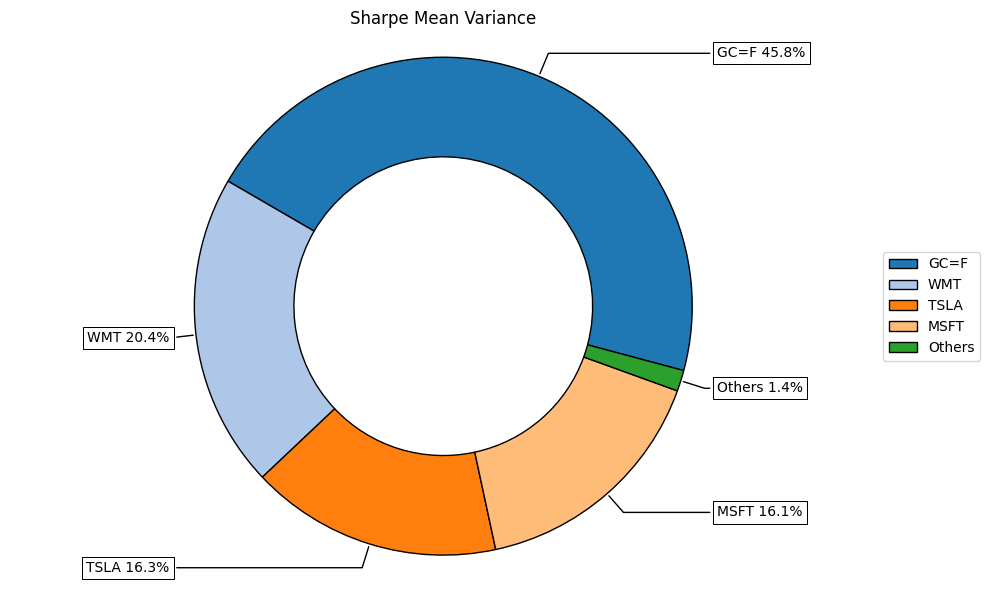

In [37]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

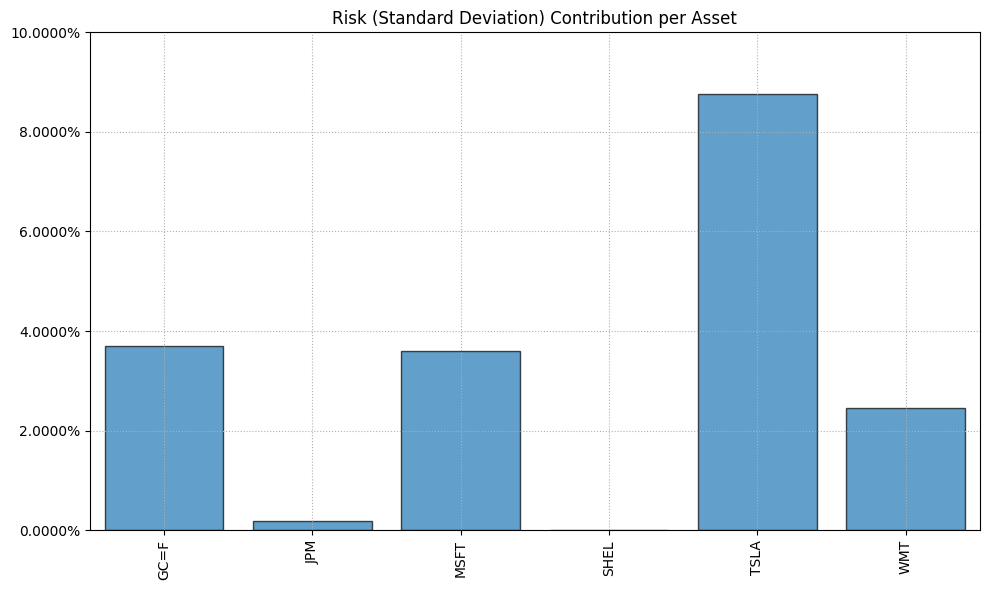

In [38]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

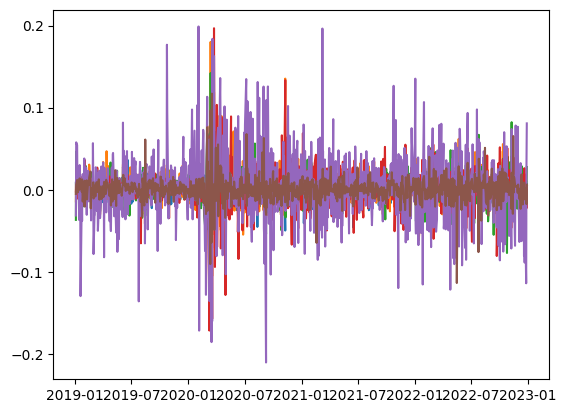

In [47]:
start = '2022-12-30'
end = '2023-05-15'
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
# Calculating returns
Y_test = data[assets].dropna()
Y_test

[*********************100%***********************]  6 of 6 completed


,GC=F,JPM,MSFT,SHEL,TSLA,WMT
Date,,,,,,
2022-12-30,181969.9951%,13208.0154%,23922.0825%,5642.5728%,12318.0000%,14067.6819%
2023-01-03,183969.9951%,13308.4778%,23898.1430%,5546.4653%,10809.9998%,14247.2641%
2023-01-04,185280.0049%,13432.5806%,22852.7618%,5491.9720%,11363.9999%,14263.1363%
2023-01-05,183480.0049%,13429.6051%,22175.4562%,5496.9257%,11033.9996%,14214.5218%
2023-01-06,186419.9951%,13686.5875%,22436.8011%,5672.2965%,11305.9998%,14562.7655%
...,...,...,...,...,...,...
2023-05-08,202630.0049%,13707.0007%,30864.9994%,6086.0001%,17178.9993%,15272.0001%
2023-05-09,203619.9951%,13641.0004%,30700.0000%,6084.0000%,16914.9994%,15297.9996%
2023-05-10,203050.0000%,13647.9996%,31230.9998%,6100.0000%,16853.9993%,15255.0003%


In [72]:
w

,weights
GC=F,45.7936%
JPM,1.3582%
MSFT,16.0959%
SHEL,0.0000%
TSLA,16.3269%
WMT,20.4254%


In [71]:
#Total return during the period= (final value - beginning value) / beginning value
re = Y_test.iloc[[0, -1]]
percent_returns = re.pct_change().dropna()
percent_returns

,GC=F,JPM,MSFT,SHEL,TSLA,WMT
Date,,,,,,
2023-05-12,10.7051%,1.5293%,29.1568%,6.9725%,36.3695%,8.8097%


In [68]:
print("Total returns using mean-variance allocation if asset invested in December and sold on May 15-2023:")
(percent_returns.iloc[0]['GC=F']*w.iloc[0]['weights'] + percent_returns.iloc[0]['JPM']*w.iloc[1]['weights'] + percent_returns.iloc[0]['MSFT']*w.iloc[2]['weights'] + percent_returns.iloc[0]['SHEL']*w.iloc[3]['weights'] + percent_returns.iloc[0]['TSLA']*w.iloc[4]['weights'] + percent_returns.iloc[0]['WMT']*w.iloc[5]['weights'] ) * 100

Total returns using mean-variance allocation if asset invested in December and sold on May 15-2023:


17.35349174819824

In [70]:
w_rp

,weights
GC=F,29.1360%
JPM,18.4072%
MSFT,10.1437%
SHEL,14.5373%
TSLA,6.7358%
WMT,21.0399%


In [73]:
print("Total returns using risk-parity allocation if asset invested in December and sold on May 15-2023:")
(percent_returns.iloc[0]['GC=F']*w_rp.iloc[0]['weights'] + percent_returns.iloc[0]['JPM']*w_rp.iloc[1]['weights'] + percent_returns.iloc[0]['MSFT']*w_rp.iloc[2]['weights'] + percent_returns.iloc[0]['SHEL']*w_rp.iloc[3]['weights'] + percent_returns.iloc[0]['TSLA']*w_rp.iloc[4]['weights'] + percent_returns.iloc[0]['WMT']*w_rp.iloc[5]['weights'] ) * 100

Total returns using risk-parity allocation if asset invested in December and sold on May 15-2023:


11.67504642875787